In [25]:
from PIL import Image
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']


In [26]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

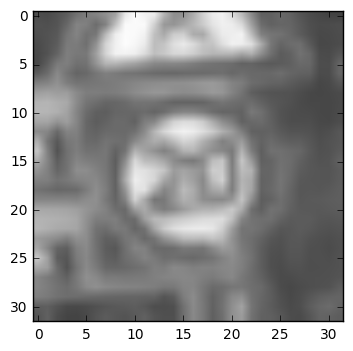

In [27]:
plt.imshow(Image.fromarray(X_train[0]).convert('LA'))
#plt.show()

In [46]:
def convert_to_gray(x):
    return Image.fromarray(x).convert('L', (0.2989, 0.5870, 0.1140, 0))

In [42]:
new_x_train = []
new_y_train = []
for x,y in zip(X_train,y_train):
    for i in range(-5, 5, 1):
        img = convert_to_gray(x)
        
        new_image = np.asarray(img.rotate(i))
        new_x_train.append(np.expand_dims(new_image, axis=2))
        new_y_train.append(y)
#     plt.imshow(new_image)
#     plt.show()


In [43]:
new_training_file = "train_new_gray.p"
new_train = {}
new_train['features'] = np.asarray(new_x_train)
new_train['labels'] = np.asarray(new_y_train)
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [44]:
np.shape(new_x_train[0])

(32, 32, 1)

In [48]:
validation_file = "validation.p"
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)

In [49]:
X_valid, y_valid = valid['features'], valid['labels']

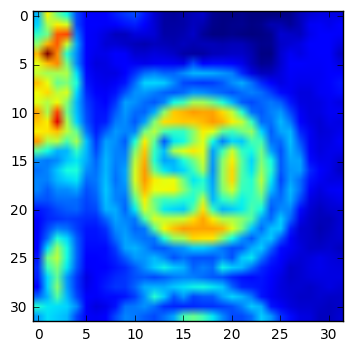

In [53]:
plt.imshow(Image.fromarray(X_valid[0]).convert('L', (0.2989, 0.5870, 0.1140, 0)))
X_valid_new =[]
y_valid_new = []
for x,y in zip(X_valid,y_valid):
    X_valid_new.append(np.expand_dims(np.asarray(convert_to_gray(x)), axis=2))
    y_valid_new.append(y)
    


In [54]:
new_training_file = "validation_gray.p"
new_train = {}
new_train['features'] = np.asarray(X_valid_new)
new_train['labels'] = np.asarray(y_valid_new)
pickle.dump( new_train, open( new_training_file, "wb" ) )